# BEST PERFORMING MOVIES AT THE BOX OFFICE ANALYSIS

## OVERVIEW*

Microsoft aims to maintain its competitive edge amid the rise of tech giants in the entertainment industry by venturing into a movie studio. Leveraging its expertise in data analytics and cloud technology, Microsoft can collect valuable user data, enabling personalized content recommendations and precise advertising. Additionally, the global appeal of streaming services offers a chance to expand its global presence and enhance brand recognition worldwide.

##  BUSINESS UNDERSTANDING*

Microsoft has ventured into the movie production industry. Being new , they lack expertise on film production among them audience preference and industry patterns. In this project I explore the elements that influence and determine the high  box office earnings attained by high performing films. This can be used to inform decisions on which films to create. 

## DATA UNDERSTANDING

The movies datasets are from Box Office Mojo, IMDb, Rotten Tomatoes, Rotten Tomatoes Reviews , The MovieDB and The Numbers

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [2]:
# Load the datasets to pandas dataframes
box_office_mojo_df = pd.read_csv("bom.movie_gross.csv")
rotten_tomatoes_df = pd.read_csv("rt.movie_info.tsv",  delimiter='\t')
rt_reviews_df = pd.read_csv("rt.reviews.tsv", delimiter='\t', encoding='ISO-8859-1') 
tmdb_df = pd.read_csv("tmdb.movies.csv", index_col=0)
tn_movie_budgets_df = pd.read_csv("tn.movie_budgets.csv") 

### Previewing The Dataset

#### Box Office Mojo

The dataset comprises information on a total of 3,387 movies, featuring details such as movie titles, studio names, domestic gross earnings, foreign gross earnings, and release years for each individual film.

In [3]:

box_office_mojo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [4]:
box_office_mojo_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [5]:
box_office_mojo_df.tail()

,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


In [6]:
box_office_mojo_df.shape

(3387, 5)

In [7]:
box_office_mojo_df.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [8]:
box_office_mojo_df["title"].value_counts()

Bluebeard                 2
The Wall (2013)           1
Escape Plan               1
The Commuter              1
The Woman in the Fifth    1
                         ..
RoboCop (2014)            1
Creation                  1
Darling Companion         1
Passengers (2016)         1
The Raven                 1
Name: title, Length: 3386, dtype: int64

In [9]:
box_office_mojo_df.duplicated().sum()

0

In [10]:
box_office_mojo_df[box_office_mojo_df["title"] == 'Bluebeard']


,title,studio,domestic_gross,foreign_gross,year
317,Bluebeard,Strand,33500.0,5200,2010
3045,Bluebeard,WGUSA,43100.0,NaN,2017


There are no duplicates. Bluebeard movie appears twice and has been produced by different studios. 

In [11]:
box_office_mojo_df["studio"].value_counts()

IFC       166
Uni.      147
WB        140
Fox       136
Magn.     136
         ... 
FOR         1
DR          1
JS          1
CFilms      1
TA          1
Name: studio, Length: 257, dtype: int64

There are missing values on domestic gross, and foreign gross columns. 

In [12]:
box_office_mojo_df["domestic_gross"].value_counts()

1100000.0      32
1000000.0      30
1300000.0      30
1200000.0      25
1400000.0      23
               ..
68800.0         1
87000000.0      1
739000.0        1
336000000.0     1
727000.0        1
Name: domestic_gross, Length: 1797, dtype: int64

In [13]:
box_office_mojo_df["foreign_gross"].value_counts()

1200000      23
1100000      14
4200000      12
1900000      12
2500000      11
             ..
119000        1
538900000     1
513000        1
687200000     1
101700000     1
Name: foreign_gross, Length: 1204, dtype: int64

In [14]:
box_office_mojo_df["year"].value_counts()

2015    450
2016    436
2012    400
2011    399
2014    395
2013    350
2010    328
2017    321
2018    308
Name: year, dtype: int64

####  The Numbers Dataset

In [15]:
tn_movie_budgets_df.shape

(5782, 6)

In [16]:
tn_movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


The dataset has no nulls

In [17]:
tn_movie_budgets_df.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

In [18]:
tn_movie_budgets_df["movie"].value_counts()

Halloween               3
Home                    3
King Kong               3
The Calling             2
Godzilla                2
                       ..
Mighty Joe Young        1
Mad Max                 1
Black Rock              1
The Spanish Prisoner    1
Dudley Do-Right         1
Name: movie, Length: 5698, dtype: int64

In [19]:
tn_movie_budgets_df["release_date"].value_counts()

Dec 31, 2014    24
Dec 31, 2015    23
Dec 31, 2010    15
Dec 31, 2008    14
Dec 31, 2009    13
                ..
Jul 1, 2014      1
Jun 4, 2004      1
Feb 5, 1953      1
Mar 29, 1974     1
Jun 21, 2000     1
Name: release_date, Length: 2418, dtype: int64

In [20]:
tn_movie_budgets_df["production_budget"].value_counts()

$20,000,000     231
$10,000,000     212
$30,000,000     177
$15,000,000     173
$25,000,000     171
               ... 
$66,000           1
$7,250,000        1
$163,000,000      1
$1,644,000        1
$18,975,000       1
Name: production_budget, Length: 509, dtype: int64

In [21]:
tn_movie_budgets_df["domestic_gross"].value_counts()

$0             548
$8,000,000       9
$7,000,000       7
$2,000,000       7
$10,000,000      6
              ... 
$87,341,380      1
$2,120,439       1
$47,907,715      1
$4,211,129       1
$51,178,893      1
Name: domestic_gross, Length: 5164, dtype: int64

In [22]:
tn_movie_budgets_df["worldwide_gross"].value_counts()

$0              367
$8,000,000        9
$7,000,000        6
$2,000,000        6
$15,000,000       4
               ... 
$6,678,033        1
$53,425,292       1
$128,885,873      1
$304,115,534      1
$29,090,445       1
Name: worldwide_gross, Length: 5356, dtype: int64

There are movies with the same title but are not duplicates. 

#### The Movie Dataset

In [23]:
tmdb_df.shape

(26517, 9)

In [24]:
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


There are no null values.

In [25]:
tmdb_df["genre_ids"].value_counts()

[99]                  3700
[]                    2479
[18]                  2268
[35]                  1660
[27]                  1145
                      ... 
[10402, 10770, 14]       1
[14, 18, 53, 27]         1
[878, 27, 35]            1
[14, 878, 27]            1
[35, 27, 16, 878]        1
Name: genre_ids, Length: 2477, dtype: int64

In [26]:
tmdb_df["original_language"].value_counts()

en    23291
fr      507
es      455
ru      298
ja      265
      ...  
sw        1
hy        1
mi        1
bo        1
hz        1
Name: original_language, Length: 76, dtype: int64

In [27]:
tmdb_df["title"].value_counts()

Home                         7
Eden                         7
Legend                       5
Alone                        5
Aftermath                    5
                            ..
Battle for Brooklyn          1
Beautiful Prison             1
Unleaded                     1
Alzheimer's: A Love Story    1
Fade to Winter               1
Name: title, Length: 24688, dtype: int64

In [28]:
tmdb_df["release_date"].value_counts()

2010-01-01    269
2011-01-01    200
2012-01-01    155
2014-01-01    155
2013-01-01    145
             ... 
1958-10-13      1
2012-04-07      1
2017-12-06      1
1936-02-27      1
2018-08-08      1
Name: release_date, Length: 3433, dtype: int64

In [29]:
tmdb_df["popularity"].value_counts()

0.600     7037
1.400      649
0.840      587
0.624      104
0.625       92
          ... 
3.742        1
14.749       1
7.924        1
8.414        1
9.060        1
Name: popularity, Length: 7425, dtype: int64

#### IMDb

In [30]:
conn = sqlite3.connect("im.db")

In [31]:
# query = """
#     SELECT primary_title, start_year, runtime_minutes, genres
#     FROM movie_basics
#     WHERE runtime_minutes IS NOT NULL AND genres IS NOT NULL
# """
query2 = """
    SELECT mb.primary_title AS title, mb.start_year, mb.runtime_minutes, mb.genres, mv.averagerating AS rating, numvotes AS votes
    FROM movie_basics mb
    JOIN movie_ratings mv
    ON mb.movie_id = mv.movie_id
    WHERE runtime_minutes IS NOT NULL AND genres IS NOT NULL
"""
# IMDb_df = pd.read_sql(query, conn).isna().any()
IMDb_popularity = pd.read_sql(query2, conn)
IMDb_popularity.head()

,title,start_year,runtime_minutes,genres,rating,votes
0,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43
2,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
4,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263


In [32]:
# close the connection to the database
conn.close()

### Data Cleaning

#### Box Office Mojo
Check and deal with NaN and missing values

In [33]:
# Check for NaN values in domestic_gross column
box_office_mojo_df["domestic_gross"].isna().sum()

28

In [34]:
# drop the columns with NaN values in domestic_gross column
box_office_mojo_df.dropna(subset=["domestic_gross"], inplace=True)
box_office_mojo_df["foreign_gross"].isna().sum()

1350

In [35]:
# Check for NaN values in foreign_gross column
box_office_mojo_df["foreign_gross"].isna().sum()

1350

In [36]:
# drop the columns with NaN values in foreign_gross column
box_office_mojo_df.dropna(subset=["foreign_gross"], inplace=True)

In [37]:
box_office_mojo_df["studio"].isna().sum()

2

In [38]:
# There are only two data without studios, we can drop them
box_office_mojo_df.dropna(subset=["studio"], inplace=True)

In [39]:
# confirm there are no missing values in the dataset
box_office_mojo_df.isna().any()

title             False
studio            False
domestic_gross    False
foreign_gross     False
year              False
dtype: bool

There are no missing values.

The foreign column should be changed to a float datatype

In [40]:
box_office_mojo_df.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

In [41]:
# replace the commas and the change to a float type
box_office_mojo_df["foreign_gross"] = box_office_mojo_df["foreign_gross"].str.replace(',', '').astype(float)
box_office_mojo_df.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross     float64
year                int64
dtype: object

In [42]:
box_office_mojo_df.info()
# The dataset is now clean.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2007 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2007 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2007 non-null   float64
 3   foreign_gross   2007 non-null   float64
 4   year            2007 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 94.1+ KB


#### The Numbers

This dataset has no null values but has placeholders in the domestic gross and worldwide gross.

In [43]:
# The missing values are denoted by $0
tn_movie_budgets_df["domestic_gross"].value_counts()

$0             548
$8,000,000       9
$7,000,000       7
$2,000,000       7
$10,000,000      6
              ... 
$87,341,380      1
$2,120,439       1
$47,907,715      1
$4,211,129       1
$51,178,893      1
Name: domestic_gross, Length: 5164, dtype: int64

In [44]:
# The missing values are denoted by $0
tn_movie_budgets_df["worldwide_gross"].value_counts()

$0              367
$8,000,000        9
$7,000,000        6
$2,000,000        6
$15,000,000       4
               ... 
$6,678,033        1
$53,425,292       1
$128,885,873      1
$304,115,534      1
$29,090,445       1
Name: worldwide_gross, Length: 5356, dtype: int64

In [45]:
# Drop the  rows with $0 in domestic gross and worldwide gross 
tn_movie_budgets_df = tn_movie_budgets_df[(tn_movie_budgets_df["domestic_gross"] != '$0') | (tn_movie_budgets_df["worldwide_gross"] != '$0')]

Change the domestic and worlwide gross columns to float

In [46]:
def floating(amount):
    new_amount = None
    if type(amount) == str:
        new_amount = float(amount.strip('$').replace(',',''))
    else:
        new_amount = float(amount)

    return new_amount
tn_movie_budgets_df["domestic_gross"] = tn_movie_budgets_df["domestic_gross"].map(floating)
tn_movie_budgets_df["worldwide_gross"] = tn_movie_budgets_df["worldwide_gross"].map(floating)

Rename the movie and worldwide gross column

In [47]:
#renaming the movie and worlwide gross columns
tn_movie_budgets_df.rename(columns = {'worldwide_gross': 'foreign_gross', 'movie': 'title'}, inplace=True)

In [48]:
#Getting only the year from the release date, changed to year
tn_movie_budgets_df["release_date"] = tn_movie_budgets_df["release_date"].map(lambda x: int(x.split()[-1]))
tn_movie_budgets_df.rename(columns={"release_date": "year"}, inplace=True)

In [49]:
# changing the production budget to float
tn_movie_budgets_df["production_budget"] = tn_movie_budgets_df["production_budget"].map(floating)

In [50]:
tn_movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5415 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5415 non-null   int64  
 1   year               5415 non-null   int64  
 2   title              5415 non-null   object 
 3   production_budget  5415 non-null   float64
 4   domestic_gross     5415 non-null   float64
 5   foreign_gross      5415 non-null   float64
dtypes: float64(3), int64(2), object(1)
memory usage: 296.1+ KB


#### The movie Dataset

Dealing with nan values

In [51]:
# check for duplicated values
tmdb_df[tmdb_df.duplicated(keep=False)]

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
10,"[16, 35, 10751]",863,en,Toy Story 2,22.698,1999-11-24,Toy Story 2,7.5,7553
43,"[35, 10749]",239,en,Some Like It Hot,14.200,1959-03-18,Some Like It Hot,8.2,1562
54,"[12, 28, 878]",20526,en,TRON: Legacy,13.459,2010-12-10,TRON: Legacy,6.3,4387
56,"[35, 16, 10751]",9994,en,The Great Mouse Detective,13.348,1986-07-02,The Great Mouse Detective,7.1,769
...,...,...,...,...,...,...,...,...,...
26481,"[35, 18]",270805,en,Summer League,0.600,2013-03-18,Summer League,4.0,3
26485,"[27, 53]",453259,en,Devils in the Darkness,0.600,2013-05-15,Devils in the Darkness,3.5,1
26504,"[27, 35, 27]",534282,en,Head,0.600,2015-03-28,Head,1.0,1
26510,[99],495045,en,Fail State,0.600,2018-10-19,Fail State,0.0,1


In [52]:
# investigating more on the duplicates
tmdb_df[tmdb_df["title"] == 'Toy Story']

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
2473,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174


In [53]:
# dropping the duplicates
tmdb_df.drop_duplicates(inplace=True)

In [54]:
#checking for any other duplicate
tmdb_df.duplicated().any()

False

Dropping columns.

In [55]:
# drop the genre_ids.A significant number of rows have an empty list. 
tmdb_df.drop("genre_ids", axis=1, inplace=True)

In [56]:
# investigating the original_title and the title
tmdb_df[["original_title", "title"]]

# They have similar values in both. We drop original_title
tmdb_df.drop("original_title", axis=1, inplace=True)

In [57]:
#drop the vote_average ,vote_count and popularity
# tmdb_df.drop(["vote_average", "vote_count"], axis=1, inplace=True)

Change the release date to year

In [58]:
tmdb_df.rename(columns={"release_date": "year"}, inplace=True)
tmdb_df["year"] = tmdb_df["year"].map(lambda x: x.split('-')[0])

In [59]:
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25497 entries, 0 to 26516
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 25497 non-null  int64  
 1   original_language  25497 non-null  object 
 2   popularity         25497 non-null  float64
 3   year               25497 non-null  object 
 4   title              25497 non-null  object 
 5   vote_average       25497 non-null  float64
 6   vote_count         25497 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 1.6+ MB


### Feature Engineering

Add total revenue column as the sum of domestic gross and foreign gross  to the BOM and The Numbers Dataset

In [60]:
# creating a total revenue column as the sum of foreign and domestic gross
box_office_mojo_df["total_revenue"] = box_office_mojo_df["domestic_gross"] + box_office_mojo_df["foreign_gross"]
box_office_mojo_df.head()

,title,studio,domestic_gross,foreign_gross,year,total_revenue
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


In [61]:
tn_movie_budgets_df["total_revenue"] = tn_movie_budgets_df["domestic_gross"] + tn_movie_budgets_df["foreign_gross"]
tn_movie_budgets_df.head()

,id,year,title,production_budget,domestic_gross,foreign_gross,total_revenue
0,1,2009,Avatar,425000000.0,760507625.0,2.776345e+09,3.536853e+09
1,2,2011,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,1.286728e+09
2,3,2019,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,1.925247e+08
3,4,2015,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.862020e+09
4,5,2017,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,1.936903e+09


Merge The Numbers DataFrame and IMDb data

In [62]:
tn_IMDb_df = pd.merge(tn_movie_budgets_df, IMDb_popularity, how='inner', on='title')
tn_IMDb_df.head()

,id,year,title,production_budget,domestic_gross,foreign_gross,total_revenue,start_year,runtime_minutes,genres,rating,votes
0,1,2009,Avatar,425000000.0,760507625.0,2.776345e+09,3.536853e+09,2011,93.0,Horror,6.1,43
1,2,2011,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,1.286728e+09,2011,136.0,"Action,Adventure,Fantasy",6.6,447624
2,3,2019,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,1.925247e+08,2019,113.0,"Action,Adventure,Sci-Fi",6.0,24451
3,4,2015,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.862020e+09,2015,141.0,"Action,Adventure,Sci-Fi",7.3,665594
4,7,2018,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,2.726950e+09,2018,149.0,"Action,Adventure,Sci-Fi",8.5,670926


Merging The movie dataset and The numbers dataset

In [63]:
tm_tn_df = pd.merge(tmdb_df, tn_movie_budgets_df, how="inner", on="title")
tm_tn_df.head()

,id_x,original_language,popularity,year_x,title,vote_average,vote_count,id_y,year_y,production_budget,domestic_gross,foreign_gross,total_revenue
0,10191,en,28.734,2010,How to Train Your Dragon,7.7,7610,30,2010,165000000.0,217581232.0,494870992.0,7.124522e+08
1,10138,en,28.515,2010,Iron Man 2,6.8,12368,15,2010,170000000.0,312433331.0,621156389.0,9.335897e+08
2,862,en,28.005,1995,Toy Story,7.9,10174,37,1995,30000000.0,191796233.0,364545516.0,5.563417e+08
3,27205,en,27.920,2010,Inception,8.3,22186,38,2010,160000000.0,292576195.0,835524642.0,1.128101e+09
4,32657,en,26.691,2010,Percy Jackson & the Olympians: The Lightning T...,6.1,4229,17,2010,95000000.0,88768303.0,223050874.0,3.118192e+08


## Data Analysis

### Univariate Analysis

#### Total Revenue

In [64]:
total_revenue_mean = tn_movie_budgets_df["total_revenue"].mean()
f"The average total revenue from making movies is {total_revenue_mean}"

'The average total revenue from making movies is 142399275.144229'

In [65]:
total_revenue_median = tn_movie_budgets_df["total_revenue"].median()
f"The total revenue median is {total_revenue_median}"

'The total revenue median is 54200060.0'

The total revenue mode

In [66]:
total_revenue_mode = tn_movie_budgets_df["total_revenue"].mode()
f"The total revenue mode is {total_revenue_mode}"
total_revenue_mode

0    16000000.0
dtype: float64

Revenue distribution

Text(0.5, 0, 'Revenue')

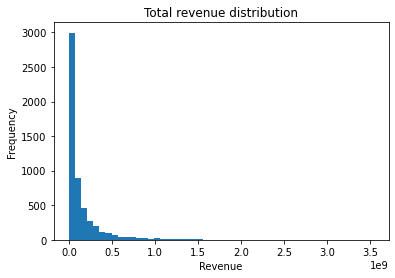

In [67]:
fig, ax = plt.subplots()
ax.hist(tn_movie_budgets_df["total_revenue"], bins=50)
ax.set_title("Total revenue distribution")
ax.set_ylabel("Frequency")
ax.set_xlabel("Revenue")
# ax.set_ylim(-1000, 6000);

The distribution is positvely skewed. The mean of the data is greater than the median. The mean is pulled towards the right tail while the median is the middle value of the data. This means the outliers of the distribution curve are further out towards the right and closer to the mean on the left

Text(0.5, 1.0, 'Total revenue')

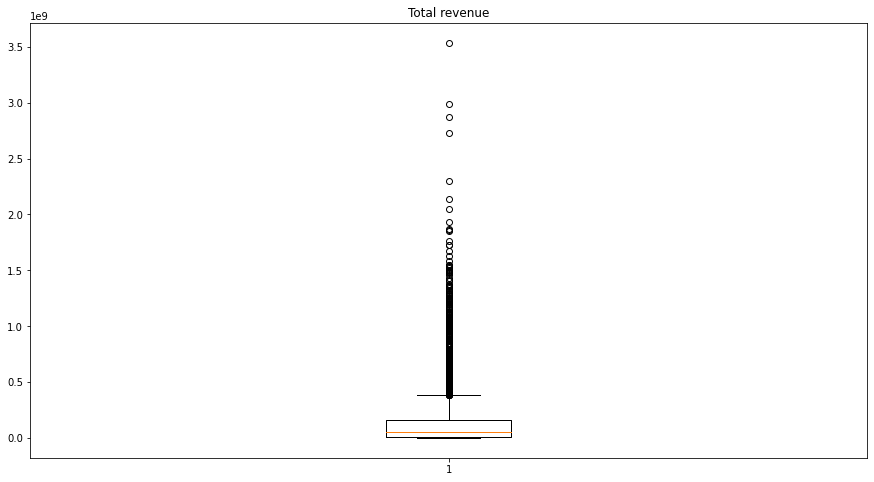

In [68]:
fig, ax = plt.subplots(figsize=(15,8))
ax.boxplot(tn_movie_budgets_df["total_revenue"])
ax.set_title("Total revenue")

In [69]:
tn_movie_budgets_df["total_revenue"].quantile([0.25, 0.5, 0.75])

0.25     11386162.0
0.50     54200060.0
0.75    161210344.5
Name: total_revenue, dtype: float64

Conclusion:     
The boxplot and the quartile range confirm that the distribution of the total revenue is positively skewed. Most movies are likely to have a relatively lower total revenue but there are few movies with significantly higher revenue that contribute to the skewness. The movies with the significantly higher revenue are the best performers at the box office.                                 
The median total revenue is `$ 54,200,060`.               
Movies with revenue higher than `$241,815,516` may be considered outliers.     
The wide range between the 25th and 75th percentiles suggests a substantial variability in total revenue. This variability could be attributed to factors such as genre, popularity and production budget.

#### Production budget

Production budget mean

In [70]:
production_budget_mean = tn_movie_budgets_df["production_budget"].mean()
f"The average production budget in  making movies is {production_budget_mean}"

'The average production budget in  making movies is 33308006.085318558'

Production budget median

In [71]:
total_revenue_median = tn_movie_budgets_df["production_budget"].median()
f"The production budget median is {total_revenue_median}"

'The production budget median is 19000000.0'

In [72]:
total_revenue_mode = tn_movie_budgets_df["production_budget"].mode()
f"The production budget mode is {total_revenue_mode}"

'The production budget mode is 0    20000000.0\ndtype: float64'

Production budget Distribution

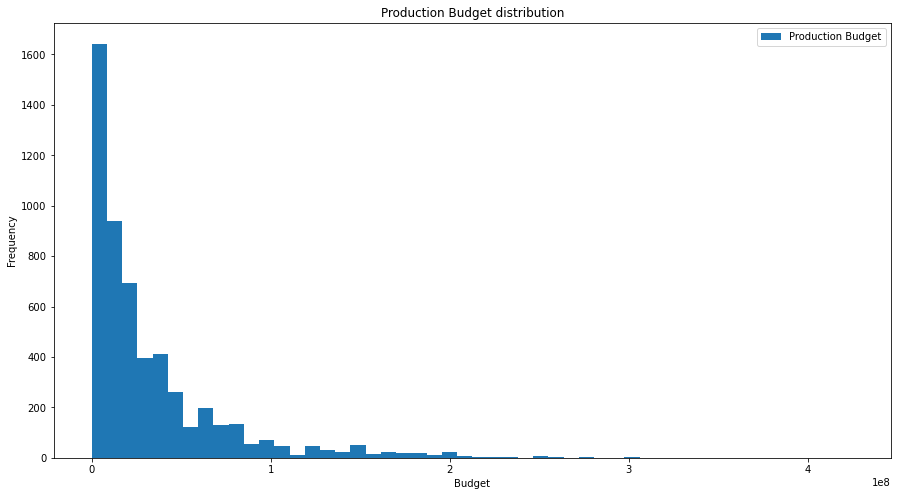

In [73]:
fig, ax = plt.subplots(figsize=(15,8))
ax.hist(tn_movie_budgets_df["production_budget"], bins=50)
ax.legend(["Production Budget"]);
ax.set_title("Production Budget distribution")
ax.set_ylabel("Frequency")
ax.set_xlabel("Budget");

The distribution is positvely skewed. The mean of the data is then greater than the median. The median is the middle value of the data. This means the outliers of the distribution curve are 

Text(0.5, 1.0, 'Production Budget')

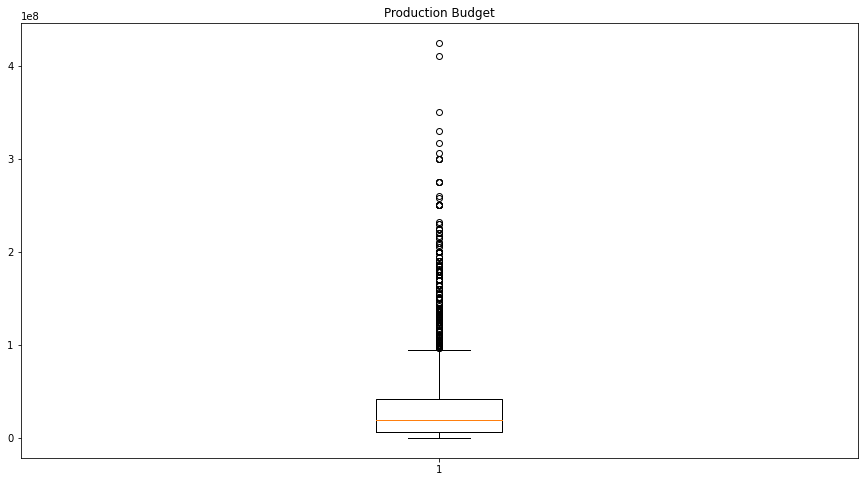

In [74]:
fig, ax = plt.subplots(figsize=(15,8))
ax.boxplot(tn_movie_budgets_df["production_budget"])
ax.set_title("Production Budget")

In [75]:
tn_movie_budgets_df["production_budget"].quantile([0.25, 0.5, 0.75])

0.25     6000000.0
0.50    19000000.0
0.75    42000000.0
Name: production_budget, dtype: float64

Conclusion:   
The box plot confirms that the distribution of the production budget is positively skewed. Most projects are likely to have a relatively lower production budget, but there are a few movies with significantly  higher production budgets and that contributes to the skewness.     
The median production budget is `$19000000`. Movies with production budgets higher than `$63000000` are considered outliers compared to the majority of the movies and can be influential in skewing the distribution to the right. 

### Bivariate analysis

#### How does the production budget affect the total revenue

In [76]:
#Finding the pearson correlation coefficient(r)
tn_movie_budgets_df["production_budget"].corr(tn_movie_budgets_df["total_revenue"],method ='pearson')

0.736922079129125

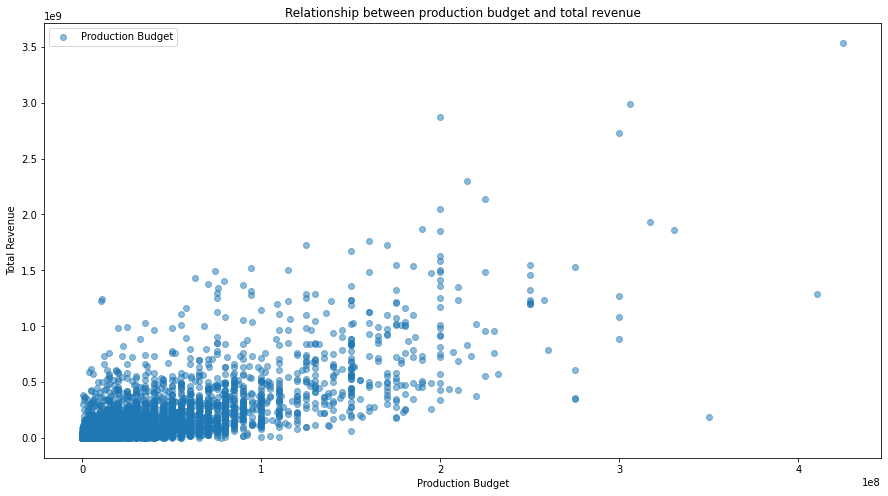

In [77]:
#Visualize the relationship between the production budget and the total revenue 
fig, ax = plt.subplots(figsize=(15,8))
ax.scatter(tn_movie_budgets_df["production_budget"], tn_movie_budgets_df["total_revenue"], alpha=0.5)
ax.legend(["Production Budget"]);
ax.set_title("Relationship between production budget and total revenue")
ax.set_ylabel("Total Revenue")
ax.set_xlabel("Production Budget");

There is a strong positive correlation between production budget and total revenue. As the production budget increases, total revenue tends to increase. However it is not a perfect relationship.  Some movies with high budgets may not perform as well as expected and some movies with lower budgets may outperform expectations.

#### Relationship between IMDb rating and total revenue


We can explore the potential relationship between movie ratings and total revenue in the IMDb dataset by creating a scatter plot, allowing us to visually analyze any correlation between these two variables.

In [78]:
# The pearson correlation between  IMDb rating and total revenue
tn_IMDb_df["total_revenue"].corr(tn_IMDb_df["rating"],method ='pearson')

0.16627140240868443

There is a weak positive relationship between total revenue and the IMDb rating

Text(0, 0.5, 'Rating')

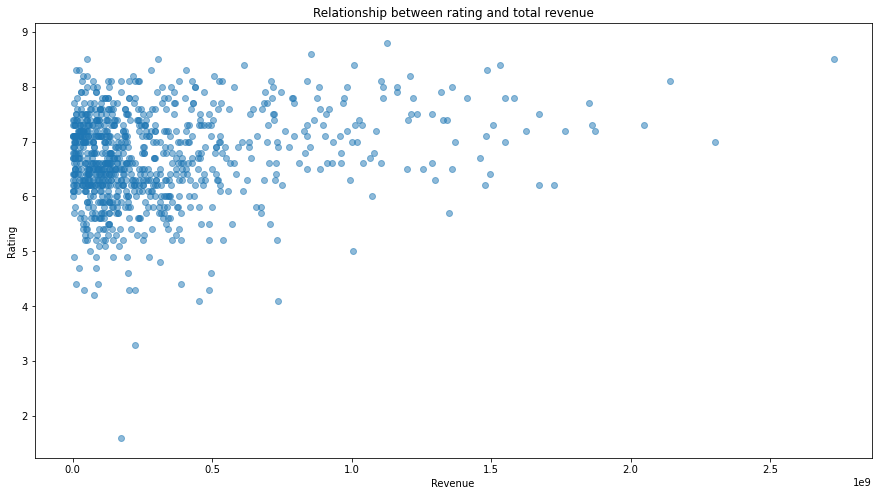

In [79]:
# Visualize the relationship betweeb total revenie and  IMDb rating.
tn_IMDb_df_2 = tn_IMDb_df[tn_IMDb_df["votes"] > 50000]
fig, ax = plt.subplots(figsize=(15, 8))
ax.scatter(tn_IMDb_df_2["total_revenue"], tn_IMDb_df_2["rating"], alpha=0.5)
ax.set_title("Relationship between rating and total revenue")
ax.set_xlabel("Revenue")
ax.set_ylabel("Rating")

There is a very weak positive relationship between the IMDb rating and total revenue of the movies. Highly rated movies do not tend to have high revenue. The rating of a movie does not imply a high total revenue.

#### Relationship between popularity and total revenue

The Movie DB dataset has a column popularity. We could use this column to explore if there is any relationship between the popularity of the movies and the total revenue by each movie

In [80]:
# correlation between the popularity and the total revenue of films
tm_tn_df.head()
tm_tn_df["popularity"].corr(tm_tn_df["total_revenue"])

0.5407727484863285

Text(0, 0.5, 'Popularity')

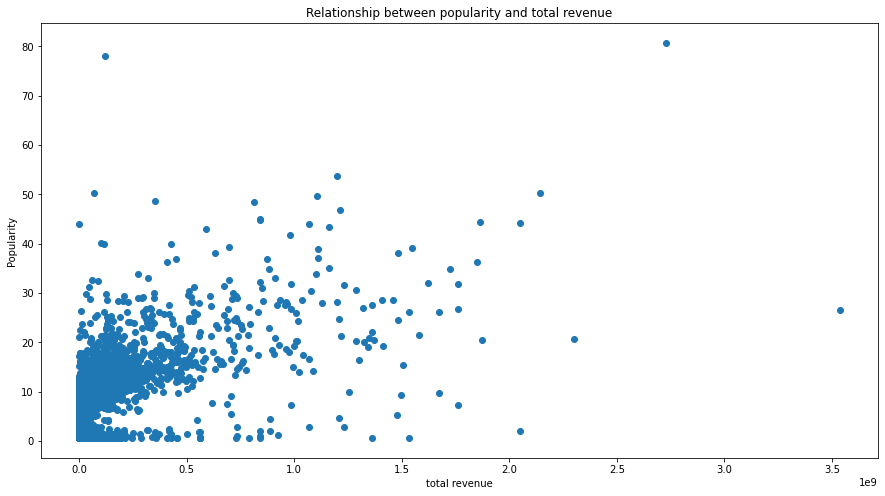

In [81]:
# Visualize the correlation between the popularity and the total revenue
fig, ax = plt.subplots(figsize=(15, 8))
ax.scatter(tm_tn_df["total_revenue"], tm_tn_df["popularity"])
ax.set_title("Relationship between popularity and total revenue")
ax.set_xlabel("total revenue")
ax.set_ylabel("Popularity")

There is a moderate positive relationship between the popularity of a movie and the total revenues. As the popularity increases, the revenue tends to increase even though moderately. 

#### Grouping movies with genres

We can get the  top 50 genres by the sum of their total revenue. 

In [82]:
# Group the dataframe by genres.
genre = tn_IMDb_df.groupby("genres").sum()

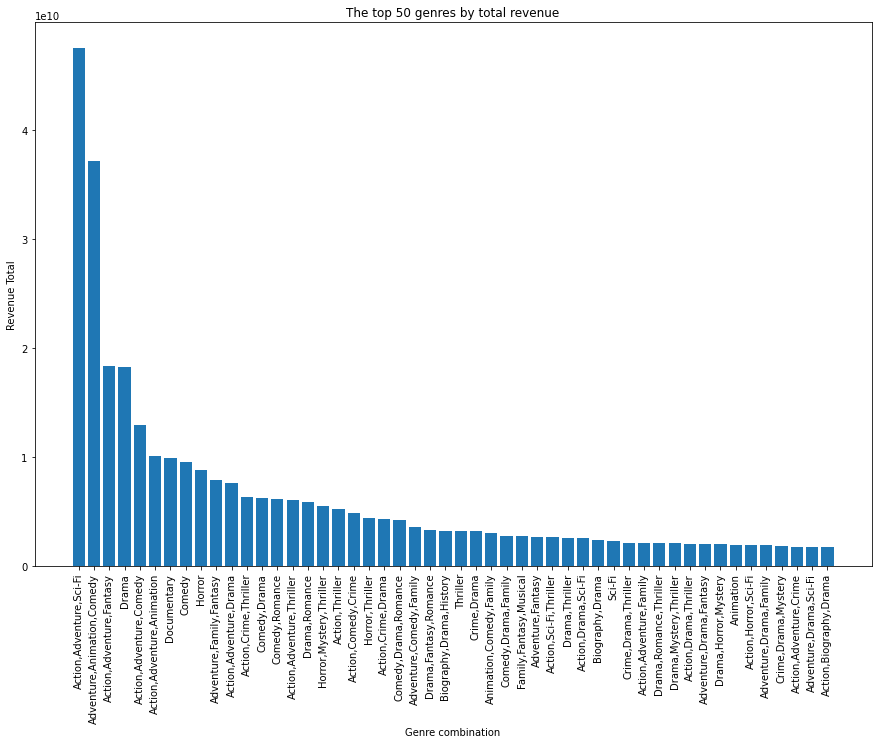

In [83]:
# Visualize the top 50 genres by their total revenue.
top_50_revenue_genre = genre.sort_values(by=["total_revenue"], ascending=False)[:50]
fig, ax = plt.subplots(figsize=(15,10))
ax.bar(top_50_revenue_genre.index, top_50_revenue_genre["total_revenue"])
ax.set_title('The top 50 genres by total revenue')
ax.set_xticks(range(len(top_50_revenue_genre.index)))
ax.set_xticklabels(top_50_revenue_genre.index, rotation=90)
ax.set_xlabel("Genre combination")
ax.set_ylabel("Revenue Total");

What genres are in the 50 top genre categories? We have seen the top 50 genre categories, which are made up of different genres. What are the genres that feature in the top 50 genre categories and thow many times do they appear?

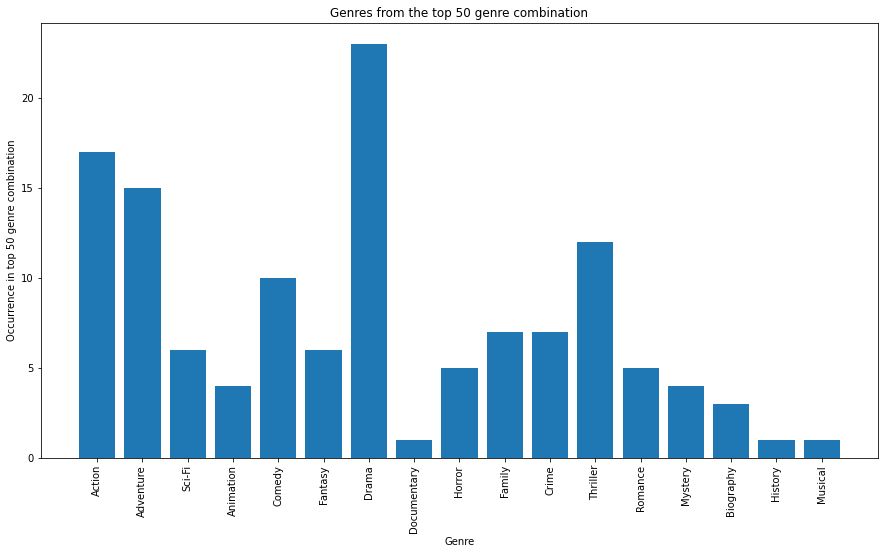

In [84]:
# Get the top genres and the frequency of their occurrence.
def best_genres(arr):
    """
    Returns the genres that make up the genre 50 categories and their occurrence.
    """
    genre_occurrence = {}
    for genre_combination in arr:
        for each_genre in genre_combination.split(','):
            if each_genre in genre_occurrence:
                genre_occurrence[each_genre] += 1
            else: 
                genre_occurrence[each_genre] = 1
    return genre_occurrence
data = best_genres(top_50_revenue_genre.index)
df = pd.DataFrame.from_dict(data, orient='index')
fig, ax = plt.subplots(figsize=(15,8))
ax.bar(df.index, df[0])
ax.set_xticks(range(len(df.index)))
ax.set_xticklabels(df.index, rotation=90)
ax.set_title("Genres from the top 50 genre combination")
ax.set_xlabel("Genre")
ax.set_ylabel("Occurrence in top 50 genre combination");

The above graph shows us the top genres.
Drama genre occurs  most,  23 times in the top 50 genre categories.  Documentary, History and Musical genres occur only once in the top 50 genre categories. 

How do  production budget and total revenue correlate in the top 50 genre combinations.

In [85]:
# Pearson correlation between the production budget and total revenue for the top 50 genre categories
top_50_revenue_genre["production_budget"].corr(top_50_revenue_genre["total_revenue"])

0.9713874658448312

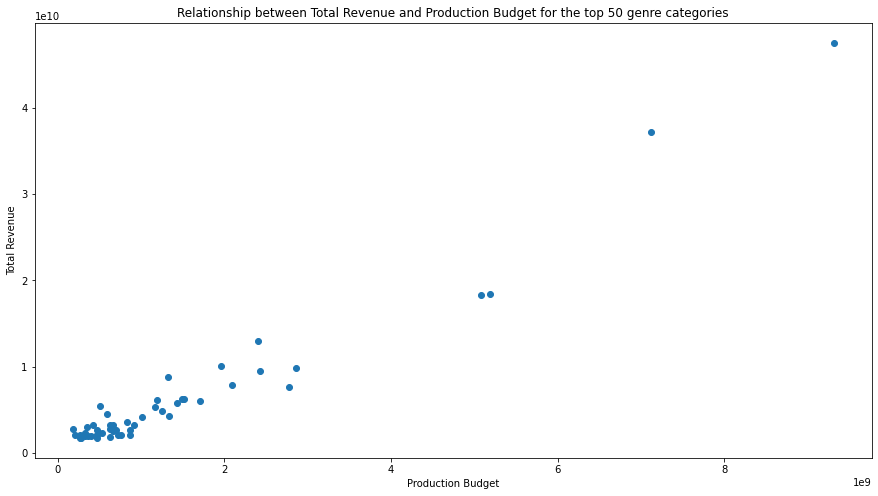

In [86]:
# Visualize the relationship between the production budget and total revenue for the top 50 genre categories.
fig, ax = plt.subplots(figsize=(15,8))
ax.scatter(top_50_revenue_genre["production_budget"], top_50_revenue_genre["total_revenue"])
ax.set_title("Relationship between Total Revenue and Production Budget for the top 50 genre categories")
ax.set_xlabel("Production Budget")
ax.set_ylabel("Total Revenue");

There is a high positive between the production budget and the total revenue. The relationship here is stronger than when movies are not grouped. As the production budget increases, the total revenue increases.

### Recomendations

##### Production Budget

**Budget Allocation Strategy** - Allocate budgets strategically based on the observed positive correlation. Consider allocating resources to high-budget productions that have the  potential generate substantial revenue. However be selective and base your decision on other factors such as genre analysis as the correlation is not perfect.

##### Genres

**Genre Prioritization** - Focus resources and efforts on genres that have consistently performed well in terms of total revenue, the genres in the top 50 genre categories. Direct more resources, both financial and creative to projects within these high revenue genres. 

**Budget optimization Strategy** - Given the strong correlation between budget and revenue in the top genres, consider allocating budgets strategically to projects with these genres to maximise returns. 

**Risk Management** - A near perfect relationship indicates a lower level of risk in budget allocation for these genres. It suggests well funded  project in the top genres are likely to yield more positive returns. 

##### Popularity
**Popularity driven marketing** - Invest in effective marketing strategies that enhance the popularity of movies. Engage with the target audience through strategies like promotions, social media and interactive campaigns to boost anticipation and interest. 

##### Ratings
**Quality vs Commercial Appeal** - While high IMdb ratings are important for prestige and reputation, recognize that ratings do not correlate with revenue.  Diversify your movie portfolio to include high rated projects as well as commercially driven projects.

## Next steps

**Cast** - Further analysis could be carried out to analyse if there is any relationship between the cast of a movie and its revenue. Do the A tier directors and actors have any correlation to the total revenue of a film?

**Genres Trend** - What is the genre trend over the years? What are the genres that are trendung now? What are the emerging genres? 